# A Tour to the Titanic

### We will build a machine learning model that will predict the chance of survival of a passenger of the Titanic

We will use a semi-cleaned version of the Popular **'Titanic'** dataset for our project. Let's get started.

<img src="Titanic.jpg" width=500px>

* ### Importing Libraries
Let's import some essential libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

* ### Loading the dataset

In [2]:
#We have two different files for the training set and test set

titanic=pd.read_csv("titanic_train.csv")


In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* ### Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!
 
  
   
* ### Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

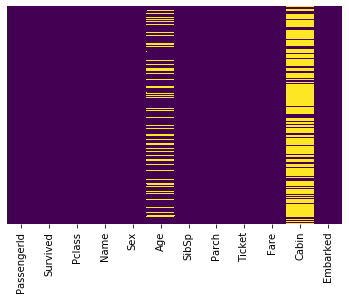

In [6]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's clean the data by imputing reasonable values to the missing values of age column and drop the cabin column.

In [7]:
# Creating function for imputing age
def impute_age(cols):
    age=cols[0]
    pclass=cols[1]
    
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else:
            return 24
    else:
        return age

* ### Now apply that function!

In [8]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

* ### Now drop the Cabin column from the dataset

In [9]:
titanic.drop(labels=['Cabin'],axis=1,inplace=True)


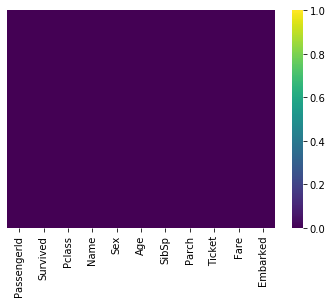

In [10]:
#creating heatmap to check if data is missing
sns.heatmap(titanic.isnull(),yticklabels=False,cmap='viridis')

* ### A very tiny amount of the embarked column is mu=issing. But as we will not use the column so we dont worry about it.

In [11]:
#Set the aesthetic style of the plots.
sns.set_style(style='whitegrid')

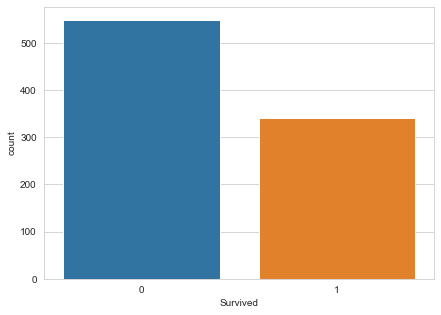

In [12]:
# Countplot of survival
plt.figure(figsize=(7,5))
sns.countplot(x='Survived',data=titanic)

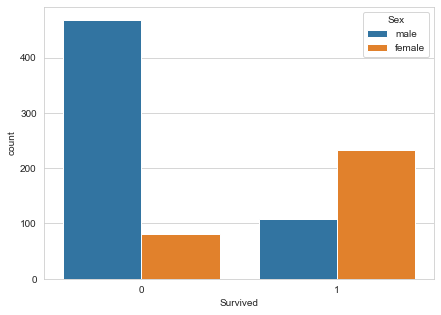

In [13]:
# Countplot of survival 
plt.figure(figsize=(7,5))
sns.countplot(x='Survived',data=titanic,hue='Sex')

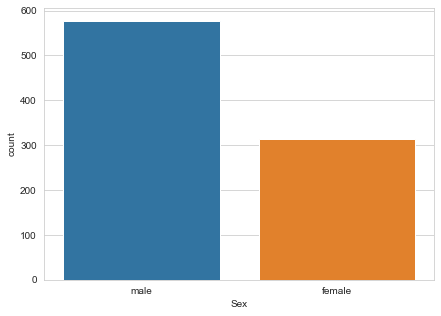

In [14]:
# Countplot of male and female
plt.figure(figsize=(7,5))
sns.countplot(x='Sex',data=titanic)

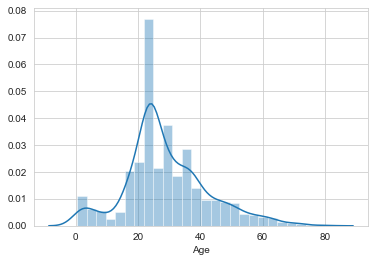

In [15]:
#Distribution of age of the passengers
sns.distplot(titanic['Age'])

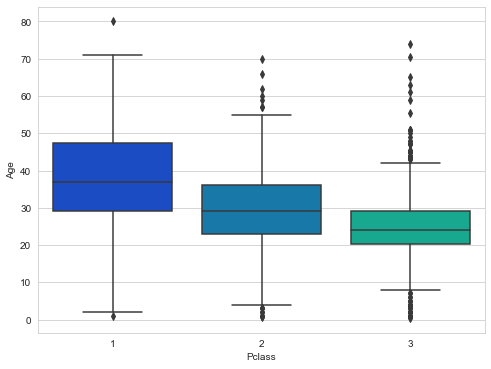

In [16]:
# Dependency of pclass on age
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='winter')

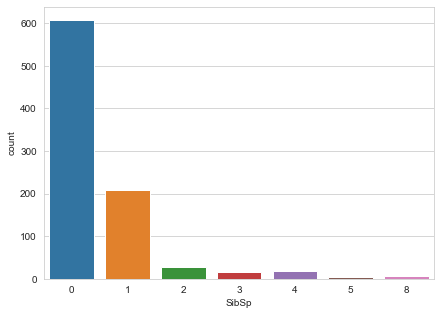

In [17]:
# Countplot of male and female
plt.figure(figsize=(7,5))
sns.countplot(x='SibSp',data=titanic)

* ### Creating the independent and dependent features

In [18]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

From the plots we have made it is clear that the 'Sex' column is a useful feature for predicting the survival of a passeger. But in our model we can not use sting value. So we have to create dummy variable for this column.

In [20]:
#Creating dummy variable for the sex column
gender=pd.get_dummies(titanic['Sex'],drop_first=True)
gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [21]:
#Concatenating the male column with our original dataframe
titanic=pd.concat([titanic,gender],axis=1)

In [22]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [23]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'male'],
      dtype='object')

In [24]:
#Selecting the useful dependent features
X=titanic[['Pclass', 'Age', 'SibSp', 'Fare', 'male']].values

#creating the dependent feature
y=titanic['Survived'].values

In [25]:
#Checking the independent features array X
X

array([[ 3.    , 22.    ,  1.    ,  7.25  ,  1.    ],
       [ 1.    , 38.    ,  1.    , 71.2833,  0.    ],
       [ 3.    , 26.    ,  0.    ,  7.925 ,  0.    ],
       ...,
       [ 3.    , 24.    ,  1.    , 23.45  ,  0.    ],
       [ 1.    , 26.    ,  0.    , 30.    ,  1.    ],
       [ 3.    , 32.    ,  0.    ,  7.75  ,  1.    ]])

In [26]:
# Checking the size of the independent features array X
X.shape

(891, 5)

In [27]:
#Checking the dependent features array y
y[:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [28]:
# Checking the size of the dependent features array y
y.shape

(891,)

* ### Splitting the whole data into training and test set

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, random_state=42)

* ### Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
# Creating an instance of the scaler
sc=StandardScaler()

In [33]:
#Fitting the scaler to the training set and transform it
X_train=sc.fit_transform(X_train)
#transforming the test set
X_test=sc.transform(X_test)

Now we are done with data preprocessing. son we can move to the next step

* ### Building a Random forest classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=15,criterion='entropy',random_state=0)
print(model)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [35]:
# Training the model
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [36]:
##Making predictions
y_pred=model.predict(X_test)

In [37]:
#Evaluating the model's performance
from sklearn.metrics import confusion_matrix,classification_report

In [38]:
mat=confusion_matrix(y_test,y_pred)
per=classification_report(y_test,y_pred)
print(mat)
print("\n\n")
print(per)

[[115  19]
 [ 27  62]]



              precision    recall  f1-score   support

           0       0.81      0.86      0.83       134
           1       0.77      0.70      0.73        89

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



* ### our dataset was quite small and we were able to achive a decent accuracy of 81%.

* ### Here we can conclude that our model is working preety well. and it will get better with more training examples.